# Mini-project 1: Kohonen Networks. (Ilaria Ricchi, Arvin Subramaniam)

***This following is the script for our simulations for mini-project 1, which should repreoduce the results displayed in the report. Few simulations here, however, are not displayed in the report, and are denoted with a ****

***NOTE: wherever approximate runtimes are indicated, the simulation was performed on a 2.6 GHz Intel Core i5 processor, with RAM of 8 GB 1600 MHz DDR3, and free memory of 100 GB on a MAC OSX***

In [1]:
import kohonen as koh
reload(koh)

(array([0, 4, 5, 8], dtype=uint8), 'digits of name')
(array([0, 4, 5, 8], dtype=uint8), 'digits of name')


<module 'kohonen' from 'kohonen.pyc'>

# Warm-up Run*

Initial centers


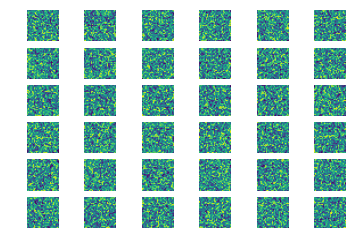

Final centers


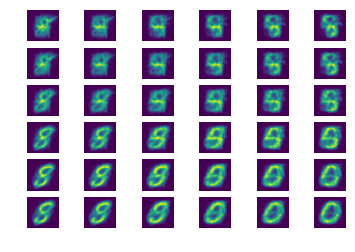

(10, 'length of grad array')


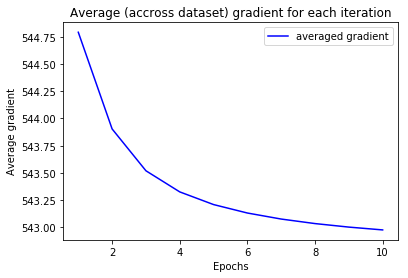

In [8]:
eta = 0.1
width = 6
sigma = 2.0
its = 20000
koh_test, grads = koh.kohonen(eta,width,sigma,its,plot=True)
koh.find_convergence(grads,its)

# 1. For small eta vary number of iterations

To find the number of epochs after which the algorithm converges, we plotted the weight update (averaged over all the datapoints and nodes) as a function of the number of epochs.

(0, 10000)
('maxium iterations is', 10000)
(5, 'length of grad array')


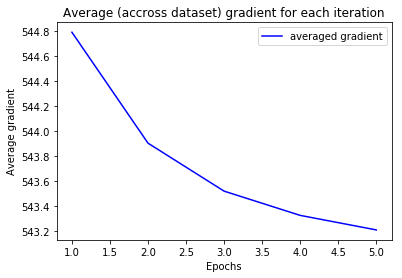

(1, 80000)
('maxium iterations is', 80000)
(40, 'length of grad array')


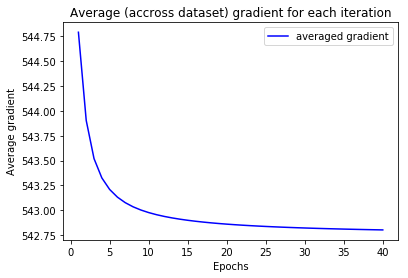

In [9]:
eta = 0.1
width = 6
sigma = 2.0
max_its = [10000,80000]
#max_its = [10000,20000,40000,80000]
for i,it in enumerate(max_its):
    print(i,it)
    print("maxium iterations is",it)
    koh_,grads = koh.kohonen(eta,width,sigma,it)
    koh.find_convergence(grads,it)

And so we qualitatively choose the number of epochs to be 20 for the subsequent parts.

# 1.1 Testing the assign_digit function*

Here we use one of the final outputs from above to assign digits to the prototypes based on a minimal distance metric.

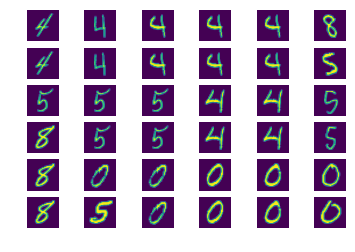

In [10]:
koh.assign_digit(koh_test)

# 1.2 Comparison with modal center-of-mass method*

Here we use the function assign_counting() instead. 

('Counting matrix is', array([[   4.,   77.,   61.,   22.],
       [   0.,   43.,    5.,    5.],
       [   0.,   87.,   10.,    5.],
       [   0.,   57.,    1.,    5.],
       [   0.,    6.,    1.,    0.],
       [   0.,    2.,    1.,  105.],
       [   3.,   26.,   17.,   31.],
       [   0.,   26.,    2.,    3.],
       [   0.,   45.,    1.,    2.],
       [   0.,   38.,    2.,    1.],
       [   0.,    4.,    0.,    1.],
       [   0.,    0.,    4.,   17.],
       [   5.,   12.,   40.,   49.],
       [   1.,   12.,   12.,   11.],
       [   1.,   26.,    5.,    0.],
       [   0.,   19.,    5.,    0.],
       [   0.,    3.,    3.,    2.],
       [   0.,    0.,   48.,   37.],
       [   1.,    0.,   25.,   62.],
       [   1.,    1.,    8.,   12.],
       [   4.,    3.,   13.,    5.],
       [   1.,    5.,    4.,    0.],
       [   2.,    2.,    6.,    0.],
       [  19.,    0.,   87.,   16.],
       [   0.,    0.,    6.,   70.],
       [   0.,    0.,    3.,    5.],
       [   2., 

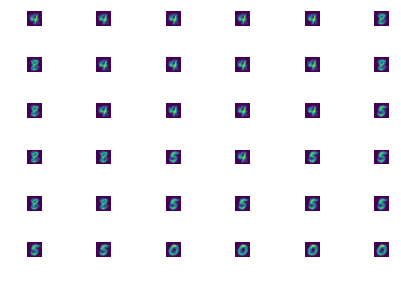

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [33]:
koh.assign_counting(koh_test,vis=True)

# 2. Vary $\eta$ to look for best convergence*

To see whether we can further improve on convergence, we now measure the averaged gradient change against the learning rate $\eta$ to see if this imrpoves convergence time.

('Learnig rate is', 0.01)
(40, 'length of grad array')


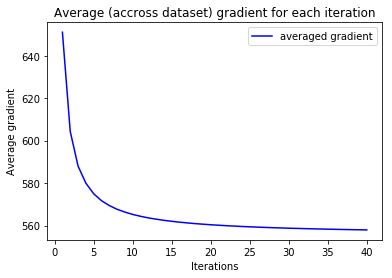

('Learnig rate is', 0.1)
(40, 'length of grad array')


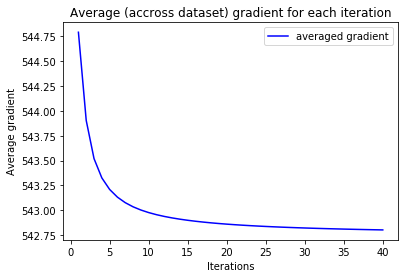

('Learnig rate is', 0.4)
(40, 'length of grad array')


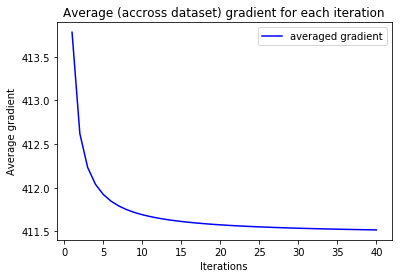

('Learnig rate is', 1.2)
(40, 'length of grad array')


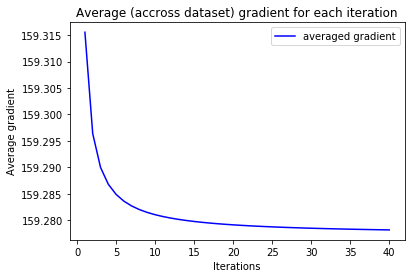

('Learnig rate is', 3.0)
(40, 'length of grad array')


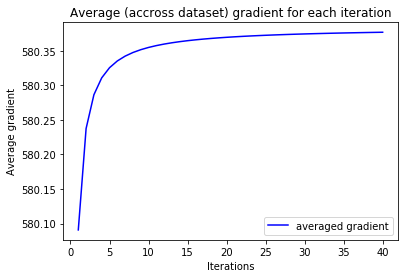

In [63]:
etas = [0.01,0.1,0.4,1.2,3.0]
width = 6
sigma = 2.0
max_it = 20000
for eta in etas:
    print("Learnig rate is",eta)
    koh_,grads = koh.kohonen(eta,width,sigma,it)
    koh.find_convergence(grads,it)

# 3. Optimize number of nodes and neighbourhood parameter using mean inter-cluster separation as loss function

***Takes about 20 minutes***

Using the inter-cluster loss function defined, an exhaustive grid search is performed to find the best parameters. A heat map is dislayed which shows this.

(array([[  49936.84727645,   25756.36282903,   13513.4894712 ],
       [ 100937.16300996,   61094.62906426,   40243.85013783],
       [ 155576.2051607 ,  111278.77006051,   79722.80200668]]), (3, 3), 'loss to be plotted')


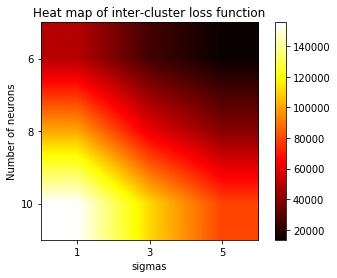

('optimal size and sigma are', 10, 1)


In [2]:
sizes_k = [6,8,10]
sigmas = [1,3,5]
k,s = koh.optimize_params(sizes_k, sigmas, eta = 0.3, tmax=20000)
print("optimal size and sigma are",k,s)

# 4. Comparison with a different kind of digit assignment  - tesselating input space and counting numbers in each cluster

Here, we use a different method of assigning digits to prototypes. First, we tesselate the input space after convergence with a hard clustering based on the minimal distance measure. Then, we count the number of data points in a given cluster and assign the prototype to the modal number.

('Counting matrix is', array([[   4.,   77.,   61.,   22.],
       [   0.,   43.,    5.,    5.],
       [   0.,   87.,   10.,    5.],
       [   0.,   57.,    1.,    5.],
       [   0.,    6.,    1.,    0.],
       [   0.,    2.,    1.,  105.],
       [   3.,   26.,   17.,   31.],
       [   0.,   26.,    2.,    3.],
       [   0.,   45.,    1.,    2.],
       [   0.,   38.,    2.,    1.],
       [   0.,    4.,    0.,    1.],
       [   0.,    0.,    4.,   17.],
       [   5.,   12.,   40.,   49.],
       [   1.,   12.,   12.,   11.],
       [   1.,   26.,    5.,    0.],
       [   0.,   19.,    5.,    0.],
       [   0.,    3.,    3.,    2.],
       [   0.,    0.,   48.,   37.],
       [   1.,    0.,   25.,   62.],
       [   1.,    1.,    8.,   12.],
       [   4.,    3.,   13.,    5.],
       [   1.,    5.,    4.,    0.],
       [   2.,    2.,    6.,    0.],
       [  19.,    0.,   87.,   16.],
       [   0.,    0.,    6.,   70.],
       [   0.,    0.,    3.,    5.],
       [   2., 

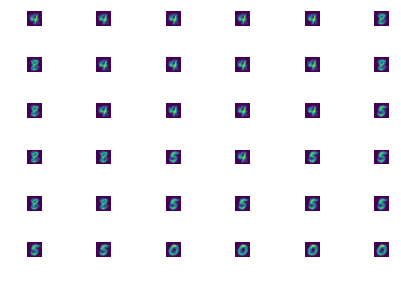

In [187]:
com, assign = koh.assign_counting(koh_test,vis=True)

# 4.1 Optimizing parameters by minimizing the average intra-cluster separation   

***Takes about 20 minutes***

With the input space now tessellated, the average intra-cluster separation then given a loss measure, that is minimized to give the optimal parameters. These are implmented thorugh the functions intra-cluster() and optimize_params_intra

('Counting matrix is', array([[   0.,   26.,   24.,    9.],
       [   1.,    3.,   27.,    8.],
       [   1.,   25.,    9.,    3.],
       [   0.,   51.,    3.,    0.],
       [   0.,   64.,    1.,    7.],
       [   0.,   72.,    1.,    5.],
       [   5.,    9.,   17.,   33.],
       [   6.,    8.,   24.,   43.],
       [   0.,  134.,   18.,   40.],
       [   0.,   15.,    4.,    4.],
       [   0.,    0.,    0.,   42.],
       [   0.,    1.,    1.,   24.],
       [   8.,    0.,   62.,   54.],
       [   2.,    0.,   20.,    3.],
       [   1.,    6.,   34.,   11.],
       [   0.,   61.,    4.,    5.],
       [   0.,    2.,    2.,   19.],
       [   0.,    0.,    0.,   13.],
       [   0.,    0.,    3.,   32.],
       [   0.,    0.,    4.,    2.],
       [   2.,    0.,   29.,   14.],
       [  11.,   13.,   26.,   22.],
       [   1.,    0.,   62.,   21.],
       [   0.,    0.,   18.,   18.],
       [   0.,    0.,    0.,   21.],
       [   0.,    0.,    0.,    7.],
       [  19., 

('Modal data according to cluster is', [8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 5, 5, 5, 8, 4, 8, 5, 5, 5, 5, 5, 4, 8, 8, 0, 0, 5, 5, 5, 4, 5, 8, 0, 0, 8, 4, 5, 5, 5, 8, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4])
('Counting matrix is', array([[   0.,    1.,   25.,   79.],
       [   0.,    0.,    0.,    0.],
       [   0.,    0.,    1.,    4.],
       [   0.,    3.,    7.,   17.],
       [   3.,    7.,   12.,   28.],
       [   1.,    5.,   19.,   34.],
       [   3.,    8.,   33.,   31.],
       [   6.,   11.,   89.,  191.],
       [   1.,    0.,    5.,   12.],
       [   0.,    0.,    0.,    0.],
       [   0.,    1.,    1.,    0.],
       [   0.,    2.,    1.,    0.],
       [   0.,    4.,    5.,    0.],
       [   1.,    3.,   10.,    2.],
       [   0.,    1.,    7.,    4.],
       [   0.,    9.,   30.,   11.],
       [   0.,    5.,    7.,   11.],
       [   0.,    0.,    0.,    0.],
       [   0.,    1.,    1.,    1.],
       [   0.,    3.,    2.,    2.],
    

('Modal data according to cluster is', [0, 0, 0, 0, 0, 0, 5, 5, 0, 8, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 4, 4, 5, 4, 0, 4, 0, 5, 0, 5, 4, 4, 4, 0, 0, 4, 8, 5, 5, 5, 4, 4, 4, 4, 0, 4, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 4, 8, 0, 0, 4, 4, 8, 8, 8, 8, 8, 8, 5, 4, 4, 4, 8, 8, 0, 8, 8, 8, 0, 0, 0, 4, 8, 8, 8, 8, 8, 8, 8, 8, 5, 4])
('Counting matrix is', array([[ 147.,    0.,    0.,    0.],
       [  13.,    2.,    0.,    1.],
       [  18.,    1.,    0.,    0.],
       [  26.,   13.,    0.,    0.],
       [  13.,   45.,    3.,    3.],
       [   8.,   59.,    6.,    2.],
       [   1.,   41.,    4.,    3.],
       [   0.,   24.,    0.,    0.],
       [   0.,   19.,    0.,    0.],
       [   0.,   56.,   23.,    3.],
       [  73.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.],
       [   2.,    1.,    0.,    0.],
       [   0.,    5.,    0.,    1.],
       [   0.,    4.,    2.,    1.],
       [   0.,    3.,    3.,    0.],
       [   0.,    8.,    0.,    1.],
       

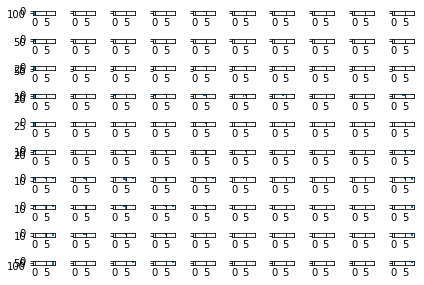

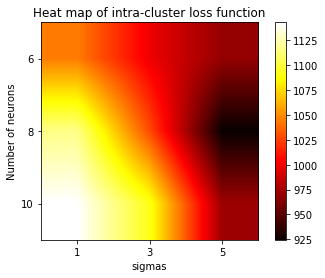

('optimal size and sigma are', 8, 5)


In [6]:
sizes_k = [6,8,10]
sigmas = [1,3,5]
k,s = koh.optimize_params_intra(sizes_k, sigmas, eta = 0.3, tmax=20000)
print("optimal size and sigma are",k,s)

# 5. Simultaneuosly maximizing inter-cluster distance and minimizing inta-cluster distance.

***Takes about 40 minutes***

Since the previous two procedures gave distinct optimal parameters, we now attempt a joint optimization. This is naively done by maximzing $\mathcal{L_{inter}} - \mathcal{L_{intra}}$.

('Counting matrix is', array([[   0.,   26.,   24.,    9.],
       [   1.,    3.,   27.,    8.],
       [   1.,   25.,    9.,    3.],
       [   0.,   51.,    3.,    0.],
       [   0.,   64.,    1.,    7.],
       [   0.,   72.,    1.,    5.],
       [   5.,    9.,   17.,   33.],
       [   6.,    8.,   24.,   43.],
       [   0.,  134.,   18.,   40.],
       [   0.,   15.,    4.,    4.],
       [   0.,    0.,    0.,   42.],
       [   0.,    1.,    1.,   24.],
       [   8.,    0.,   62.,   54.],
       [   2.,    0.,   20.,    3.],
       [   1.,    6.,   34.,   11.],
       [   0.,   61.,    4.,    5.],
       [   0.,    2.,    2.,   19.],
       [   0.,    0.,    0.,   13.],
       [   0.,    0.,    3.,   32.],
       [   0.,    0.,    4.,    2.],
       [   2.,    0.,   29.,   14.],
       [  11.,   13.,   26.,   22.],
       [   1.,    0.,   62.,   21.],
       [   0.,    0.,   18.,   18.],
       [   0.,    0.,    0.,   21.],
       [   0.,    0.,    0.,    7.],
       [  19., 

('Modal data according to cluster is', [8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 5, 5, 5, 8, 4, 8, 5, 5, 5, 5, 5, 4, 8, 8, 0, 0, 5, 5, 5, 4, 5, 8, 0, 0, 8, 4, 5, 5, 5, 8, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4])
('Counting matrix is', array([[   0.,    1.,   25.,   79.],
       [   0.,    0.,    0.,    0.],
       [   0.,    0.,    1.,    4.],
       [   0.,    3.,    7.,   17.],
       [   3.,    7.,   12.,   28.],
       [   1.,    5.,   19.,   34.],
       [   3.,    8.,   33.,   31.],
       [   6.,   11.,   89.,  191.],
       [   1.,    0.,    5.,   12.],
       [   0.,    0.,    0.,    0.],
       [   0.,    1.,    1.,    0.],
       [   0.,    2.,    1.,    0.],
       [   0.,    4.,    5.,    0.],
       [   1.,    3.,   10.,    2.],
       [   0.,    1.,    7.,    4.],
       [   0.,    9.,   30.,   11.],
       [   0.,    5.,    7.,   11.],
       [   0.,    0.,    0.,    0.],
       [   0.,    1.,    1.,    1.],
       [   0.,    3.,    2.,    2.],
    

('Modal data according to cluster is', [0, 0, 0, 0, 0, 0, 5, 5, 0, 8, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 4, 4, 5, 4, 0, 4, 0, 5, 0, 5, 4, 4, 4, 0, 0, 4, 8, 5, 5, 5, 4, 4, 4, 4, 0, 4, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 4, 8, 0, 0, 4, 4, 8, 8, 8, 8, 8, 8, 5, 4, 4, 4, 8, 8, 0, 8, 8, 8, 0, 0, 0, 4, 8, 8, 8, 8, 8, 8, 8, 8, 5, 4])
('Counting matrix is', array([[ 147.,    0.,    0.,    0.],
       [  13.,    2.,    0.,    1.],
       [  18.,    1.,    0.,    0.],
       [  26.,   13.,    0.,    0.],
       [  13.,   45.,    3.,    3.],
       [   8.,   59.,    6.,    2.],
       [   1.,   41.,    4.,    3.],
       [   0.,   24.,    0.,    0.],
       [   0.,   19.,    0.,    0.],
       [   0.,   56.,   23.,    3.],
       [  73.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.],
       [   2.,    1.,    0.,    0.],
       [   0.,    5.,    0.,    1.],
       [   0.,    4.,    2.,    1.],
       [   0.,    3.,    3.,    0.],
       [   0.,    8.,    0.,    1.],
       

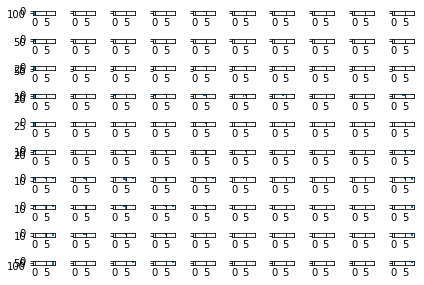

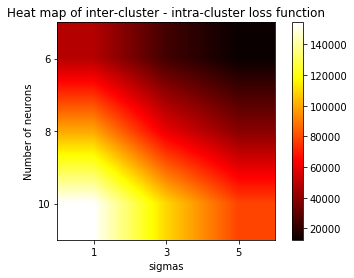

('optimal size and sigma are', 10, 1)


In [52]:
sizes_k = [6,8,10]
sigmas = [1,3,5]
k,s = koh.joint_optimization(sizes_k, sigmas, eta = 0.3, tmax=20000)#Change to 20000
print("optimal size and sigma are",k,s)

# 6. Varying sigma with epochs.

***Takes about 1 hour***

Here, we run the kohonen_sigma() function. This takes in different rates of change of sigma for the five epochs, which we call an annealing rate $\alpha$, starting from a high value and ending at $\sigma = 1$ for the final epoch. The function then plots the inter-cluster loss against $\sigma$ for each rate, and the $\sigma-$averaged against the rates. 

Eg: An $\alpha$ of 0.5 means that within tmax/dy number of epochs (this is typically 20000/2000 = 10), with $\sigma(epoch=10)$ fixed to 1, it follows that $\sigma(epoch=1) = 5$, with the gradient in between tose two values equal to 0.5. The other $\sigma$s then follow from a liner interpolation.

In [ ]:
rates = [0.2,0.5,1.0]
koh.kohonen_sigma(rates)

/Users/arvingopal5794/anaconda/envs/bmnn/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/arvingopal5794/anaconda/envs/bmnn/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
